6510405377 จิตรลดา โยธินทะ

In [1]:
import pandas as pd
import seaborn as sns

# 1. เปิดไฟล์ players.csv ขึ้นมาเพื่อใช้ในแบบฝึกหัดนี้ (อย่าลืมตัดคอลัมน์ว่างออกด้วย) จากนั้นให้หารค่าในคอลัมน์ shots, passes, tackles, และ saves ด้วยจำนวนนาทีของผู้เล่นคนนั้น เพื่อการเปรียบเทียบที่เท่าเทียมกัน และทำให้ตำแหน่ง (position) เป็น Category ที่เรียงลำดับจาก goalkeeper, defender, midfielder, forward

In [2]:
players = pd.read_csv("players.csv").loc[:,:'saves']
players

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0
591,Howard,USA,goalkeeper,390,0,81,0,14
592,Jozy Altidore,USA,forward,356,8,84,2,0
593,Onyewu,USA,defender,170,1,69,2,0


In [3]:
players.shots = players.shots/players.minutes
players.passes = players.passes/players.minutes
players.tackles = players.tackles/players.minutes
players.saves = players.saves/players.minutes
players

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0.000000,0.375000,0.000000,0.000000
1,Belhadj,Algeria,defender,270,0.003704,0.540741,0.029630,0.000000
2,Boudebouz,Algeria,midfielder,74,0.040541,0.378378,0.013514,0.000000
3,Bougherra,Algeria,defender,270,0.003704,0.329630,0.040741,0.000000
4,Chaouchi,Algeria,goalkeeper,90,0.000000,0.188889,0.000000,0.022222
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0.000000,0.500000,0.000000,0.000000
591,Howard,USA,goalkeeper,390,0.000000,0.207692,0.000000,0.035897
592,Jozy Altidore,USA,forward,356,0.022472,0.235955,0.005618,0.000000
593,Onyewu,USA,defender,170,0.005882,0.405882,0.011765,0.000000


In [4]:
players.position = pd.Categorical(players.position, ordered = True,
               categories = ['goalkeeper', 'defender',
                             'midfielder', 'forward'])
players

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0.000000,0.375000,0.000000,0.000000
1,Belhadj,Algeria,defender,270,0.003704,0.540741,0.029630,0.000000
2,Boudebouz,Algeria,midfielder,74,0.040541,0.378378,0.013514,0.000000
3,Bougherra,Algeria,defender,270,0.003704,0.329630,0.040741,0.000000
4,Chaouchi,Algeria,goalkeeper,90,0.000000,0.188889,0.000000,0.022222
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0.000000,0.500000,0.000000,0.000000
591,Howard,USA,goalkeeper,390,0.000000,0.207692,0.000000,0.035897
592,Jozy Altidore,USA,forward,356,0.022472,0.235955,0.005618,0.000000
593,Onyewu,USA,defender,170,0.005882,0.405882,0.011765,0.000000


# 2. แสดงแผนภาพการกระจายตัวแบบ probability density function ของการส่งลูก (passes) ของผู้เล่นทุกคน

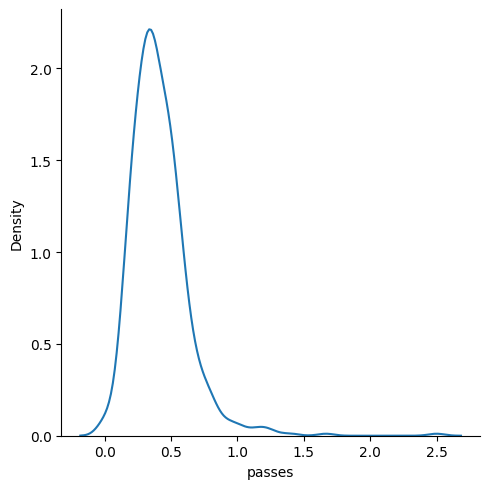

In [5]:
sns.displot(data = players, x = 'passes', kind = 'kde')

# 3. แสดง histogram ของการยิงประตู (shots) ของผู้เล่นทีม USA

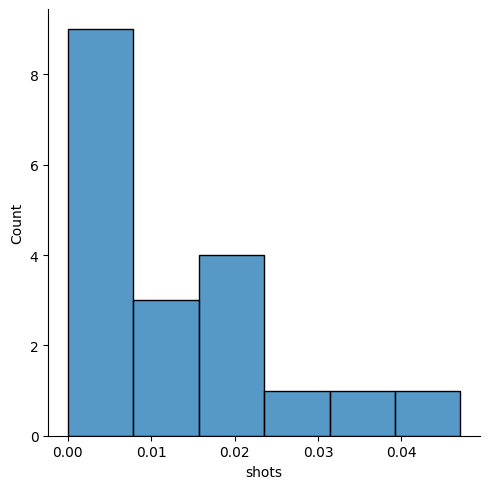

In [6]:
sns.displot(data = players.loc[players.team == 'USA'], x = 'shots', kind = 'hist')

# 4. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นทุกคน

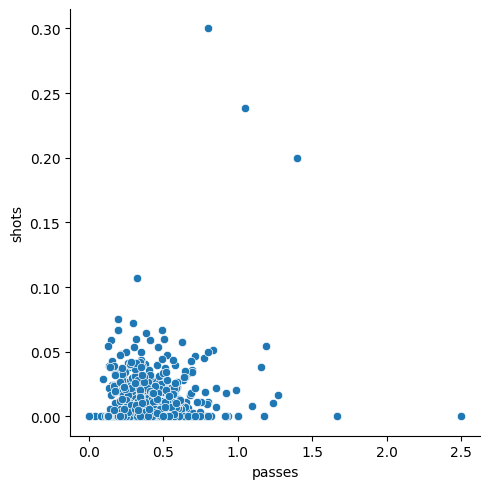

In [7]:
sns.relplot(players, kind="scatter",x = 'passes', y = 'shots')

#  5. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นที่ม Brazil, Spain, USA โดยให้แยกสีระหว่างผู้เล่นแต่ละทีม และแยกสัญลักษณ์ระหว่างตำแหน่งการเล่นด้วย

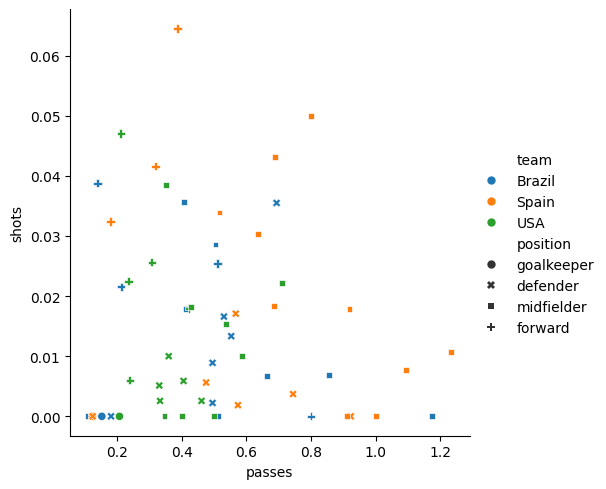

In [8]:
sns.relplot(players.loc[players.team.isin(['Brazil', 'Spain', 'USA'])], kind="scatter",
            x = 'passes', y = 'shots', hue = 'team', style='position')

# 6. แสดง relation plot แบบ scatter plot ระหว่าง tackles (แกน x) กับ shots (แกน y) ของผู้เล่นทีม Brazil, Spain, USA แต่แสดงเป็นแบบ Grid โดยให้แถวแยกตามตำแหน่งผู้เล่น คอลัมน์แยกตามทีม

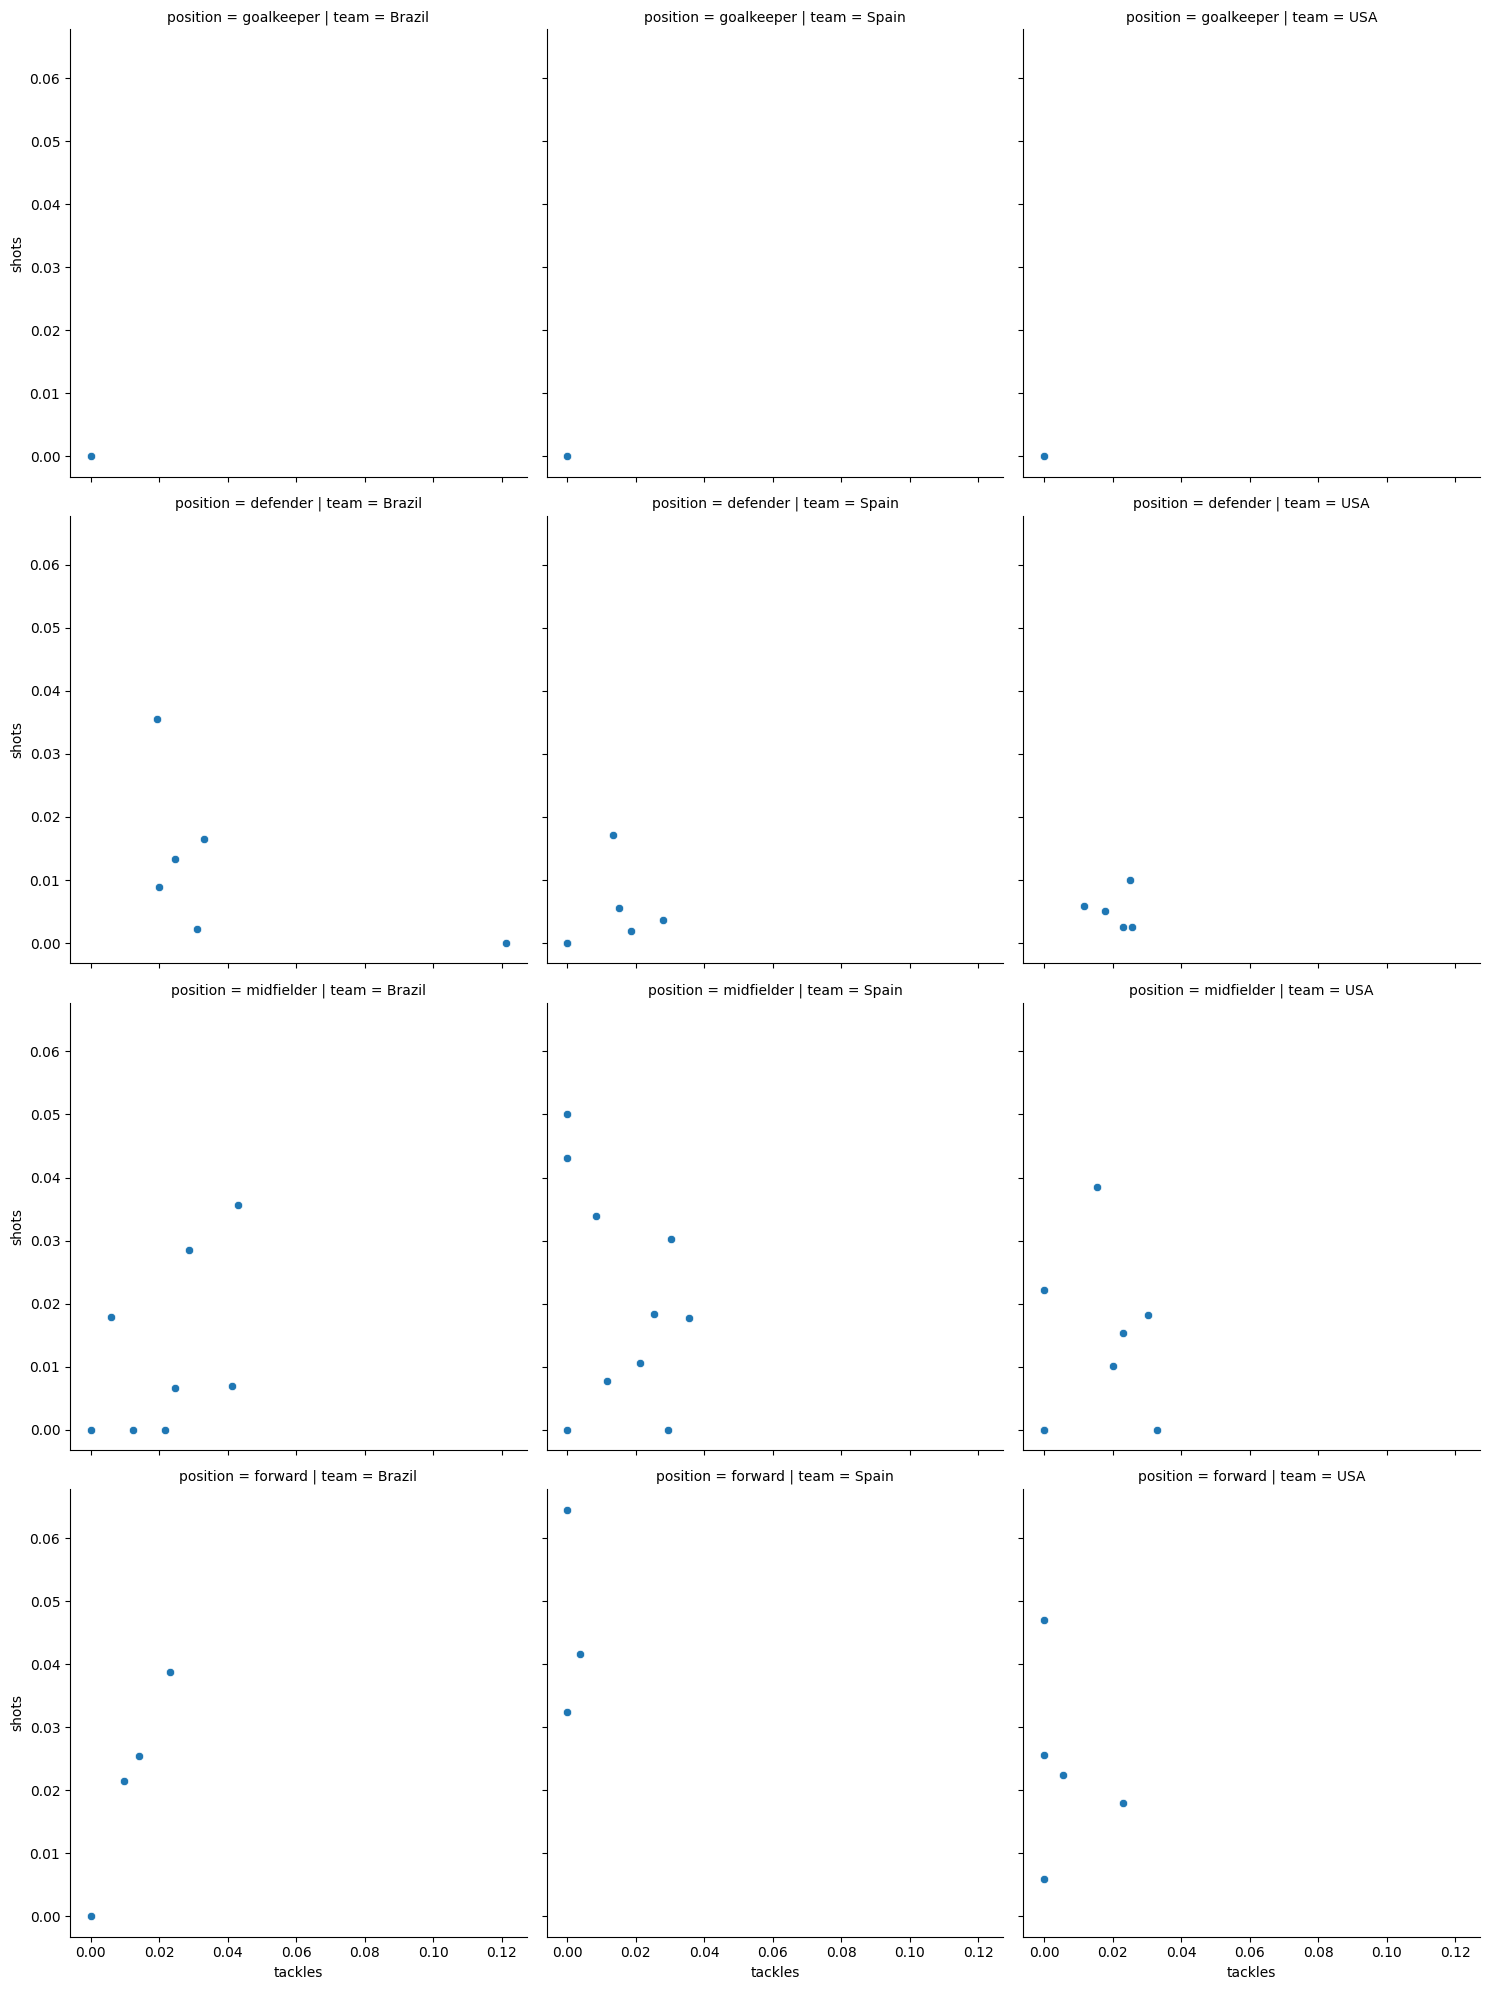

In [9]:
sns.relplot(players.loc[players.team.isin(['Brazil', 'Spain', 'USA'])], kind="scatter",
            x = 'tackles', y = 'shots', row="position", col='team')

# 7. แสดง Boxplot ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA

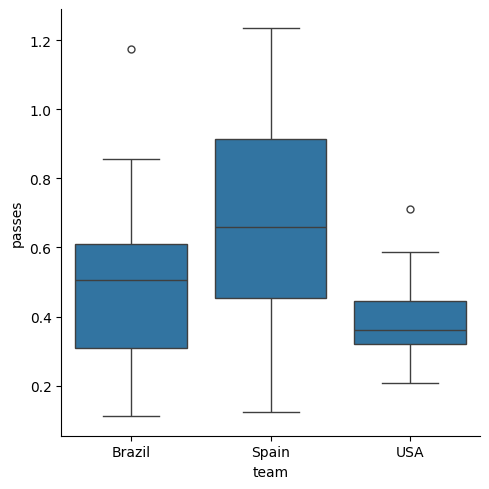

In [10]:
sns.catplot(players.loc[players.team.isin(['Brazil', 'Spain', 'USA'])], 
            y = 'passes', x = 'team', 
            kind='box')

# 8. แสดง swarm ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA แยกสีตามตำแหน่ง

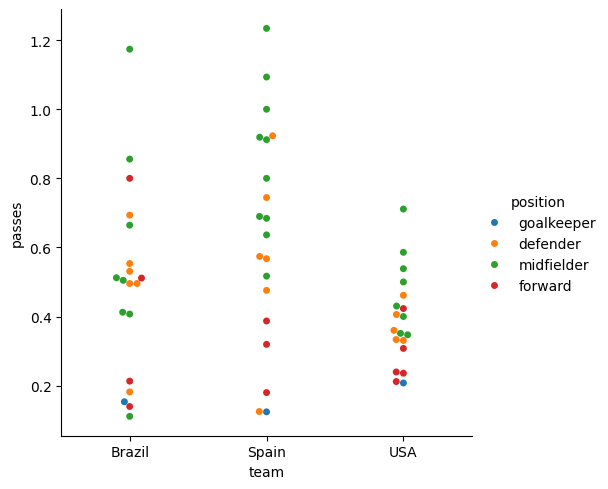

In [11]:
sns.catplot(players.loc[players.team.isin(['Brazil', 'Spain', 'USA'])], 
            y = 'passes', x = 'team', 
            kind='swarm', hue = 'position')

# 9. แสดงกราฟแท่ง (bar) ของการสกัดลูก (tackles) ของผู้เล่นทีม Brazil, Spain, USA แต่ละตำแหน่ง แยกสีตามทีม

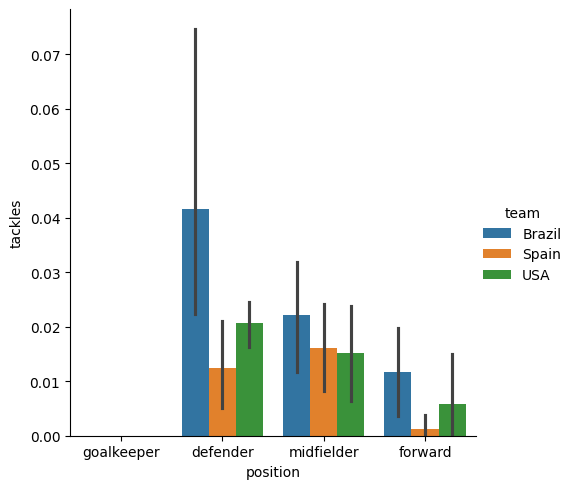

In [12]:
sns.catplot(players.loc[players.team.isin(['Brazil', 'Spain', 'USA'])], 
            y = 'tackles', x = 'position', 
            kind='bar', hue = 'team')

# 10. แสดง scatter plot ของผลรวมค่า passes (เป็นแกน x) กับผลรวมค่า shots (แกน y) ของผู้เล่นทุกคนในทีม 'Brazil','Japan','USA','Spain','Algeria','France','England','South Korea' แยกสีตามทีม

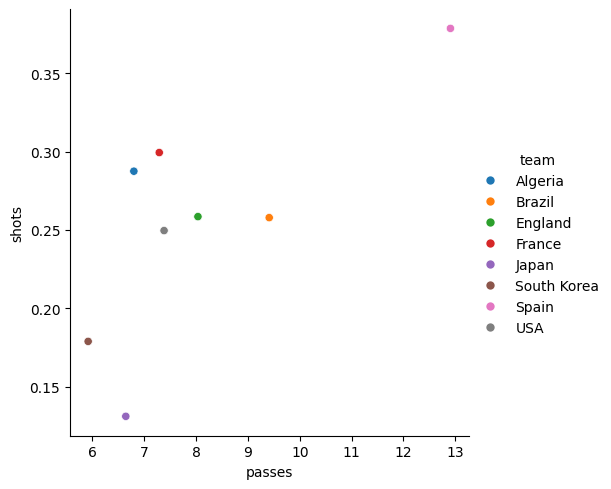

In [13]:
sns.relplot(players.loc[players.team.isin(['Brazil','Japan','USA','Spain','Algeria','France','England','South Korea'])].groupby("team").agg({'passes': 'sum', 'shots': 'sum'}), 
            kind="scatter",x = 'passes', y = 'shots', hue = 'team')

# 11. แสดง distribution plot ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA รวมในกราฟเดียวกัน แยกสีตามทีม

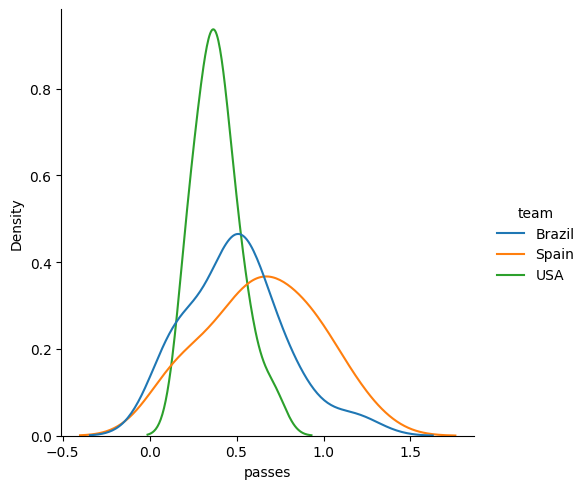

In [14]:
sns.displot(data = players.loc[players.team.isin(['Brazil', 'Spain', 'USA'])], 
            x = 'passes', kind = 'kde', hue= 'team')